## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [4]:
df = pd.read_csv('./dataset/CC GENERAL.csv')

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df = df.fillna(0)

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df = pd.get_dummies(df)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Columns: 8967 entries, BALANCE to CUST_ID_C19190
dtypes: bool(8950), float64(14), int64(3)
memory usage: 77.6 MB


## K-Means

Find the optimal Kmeans model

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_df)

In [13]:
len(scaled_df)

8950

In [14]:
df['Cluster'] = cluster_labels

Choose the optimal K and calculate the silhouette score for the best model.

Text(0, 0.5, ' Sum of Squared Distances')

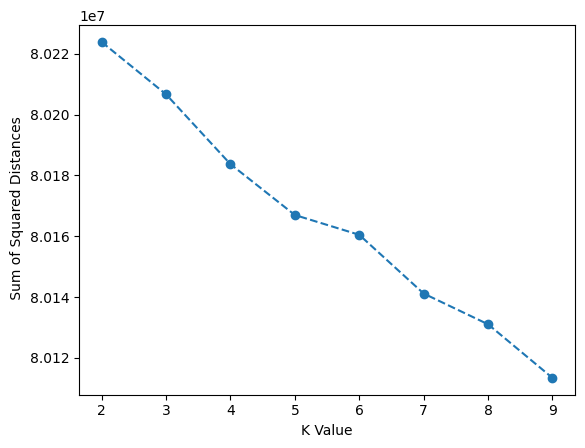

In [15]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [16]:
pd.Series(ssd).diff()

0             NaN
1   -17207.837681
2   -22945.669998
3   -16720.370324
4    -6517.497779
5   -19294.909397
6   -10111.158463
7   -17624.137323
dtype: float64

<Axes: >

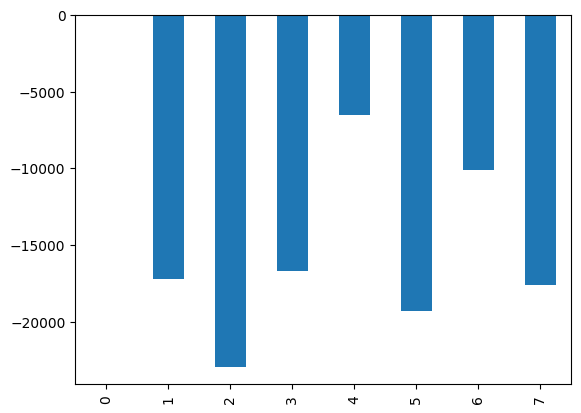

In [17]:
pd.Series(ssd).diff().plot(kind='bar')

Text(0, 0.5, ' Silloutte Distances')

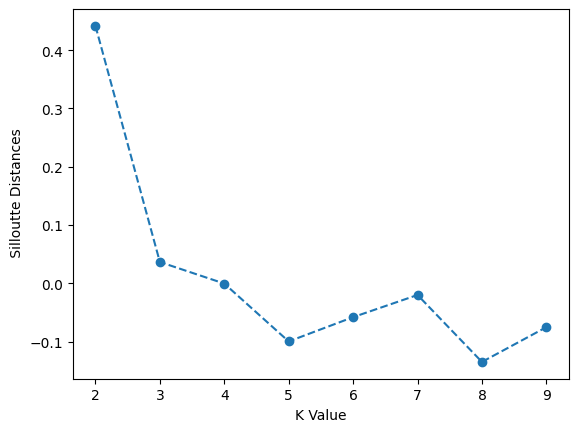

In [18]:
from sklearn.metrics import silhouette_score
s=[]
for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    silhouette=silhouette_score(df,model.labels_)#,metric='euclidean')
    s.append(silhouette)
plt.plot(range(2,10),s,'o--')
plt.xlabel("K Value")
plt.ylabel(" Silloutte Distances")




## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [20]:
s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,20)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
model = AgglomerativeClustering(n_clusters=7, linkage="average")
model = model.fit(df)
silhouette=silhouette_score(df,model.labels_)#,metric='euclidean')
s.append(silhouette)
model = AgglomerativeClustering(n_clusters=4, linkage="single")
model = model.fit(df)
silhouette=silhouette_score(df,model.labels_)#,metric='euclidean')
s.append(silhouette)


In [21]:
s

[0.7901132585249814, 0.864376744160006]

Choose the optimal K and calculate the silhouette score for the best model.

In [22]:
#Since the silhouette score of the second model is higher than the first model, we can say that the second model is better than the first model. Therefore, the best model is the second model.

## DBSCAN

Find the optimal DBSCAN model.

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3000, min_samples=5)  # Adjust based on the k-distance plot
cluster_labels = dbscan.fit_predict(df)
print(set(cluster_labels))  # Check unique cluster labels


{0, 1, 2, 3, -1}


In [41]:
from sklearn.metrics import silhouette_score

# Remove noise points (-1) before computing the score
valid_points = df[cluster_labels != -1]
valid_labels = cluster_labels[cluster_labels != -1]

# Compute Silhouette Score
if len(set(valid_labels)) > 1:  # Ensure at least 2 clusters exist
    score = silhouette_score(valid_points, valid_labels)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette score cannot be computed (only one cluster found).")


Silhouette Score: 0.6549040016081394


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=30, min_samples=5)  # Adjust based on the k-distance plot
cluster_labels2 = dbscan.fit_predict(df)
print(set(cluster_labels2))  # Check unique cluster labels

{0, 1, 2, -1}


In [43]:
from sklearn.metrics import silhouette_score

# Remove noise points (-1) before computing the score
valid_points = df[cluster_labels2 != -1]
valid_labels = cluster_labels2[cluster_labels2 != -1]

# Compute Silhouette Score
if len(set(valid_labels)) > 1:  # Ensure at least 2 clusters exist
    score = silhouette_score(valid_points, valid_labels)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette score cannot be computed (only one cluster found).")


Silhouette Score: 0.7691451587035614


In [ ]:
#Since the silhouette score of the first model is higher than the second model, we can say that the second model is better than the first model. Therefore, the best model is the second model. and also because the epsilon value is 30, it is better and more reasonable than the first model.

Find the parameters that optimize the performance of your model and calculate the silhouette score.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
# from my pount of view, the best model is the agglomerative model because it has the highest silhouette score and the number of clusters is better which is 4.